In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
url="https://www.neuraldesigner.com/files/datasets/solarpowergeneration.csv"
df=pd.read_csv(url)

In [ ]:
df.shape

(2920, 10)

In [ ]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [ ]:
 df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [ ]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [ ]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


DRAWING SCATTER PLOTS BETWEEN INPUTS AND TARGET VARIABLES

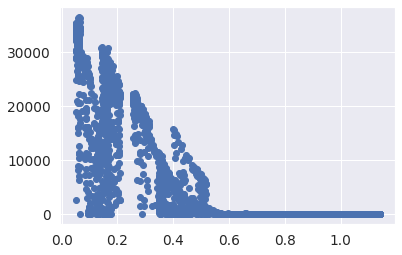

In [ ]:
plt.scatter(x=df['distance-to-solar-noon'], y=df['power-generated']);

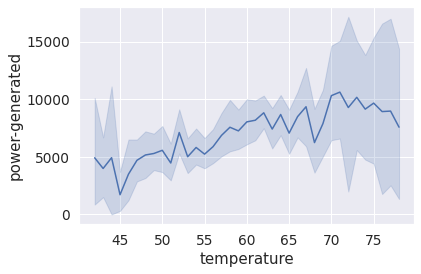

In [ ]:
sns.lineplot(x="temperature", y="power-generated", data=df);

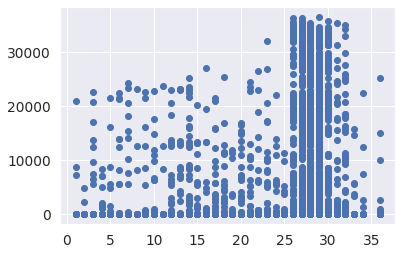

In [ ]:
plt.scatter(x=df['wind-direction'], y=df['power-generated'])

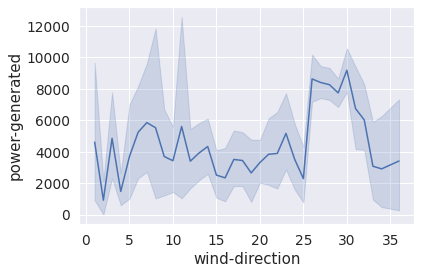

In [ ]:
sns.lineplot(x="wind-direction", y="power-generated", data=df);

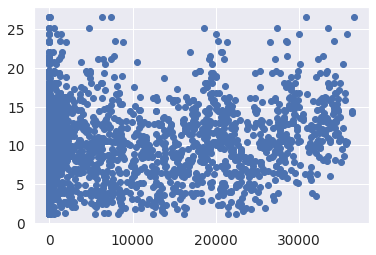

In [ ]:
plt.scatter(x=df['power-generated'], y=df['wind-speed'])

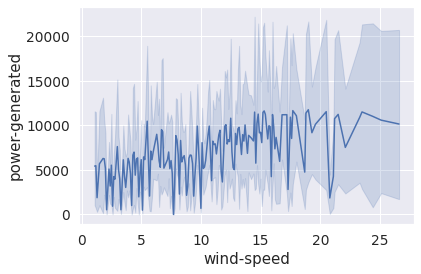

In [ ]:
sns.lineplot(x="wind-speed", y="power-generated", data=df)

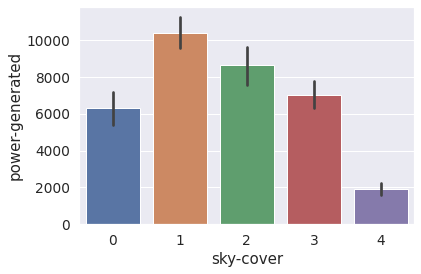

In [ ]:
sns.barplot(x=df['sky-cover'], y=df['power-generated']);

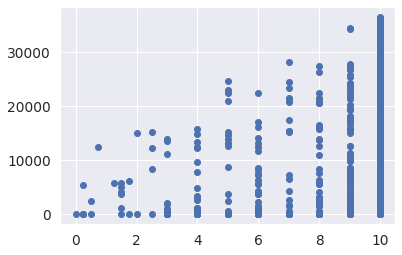

In [ ]:
plt.scatter(x=df['visibility'], y=df['power-generated']);

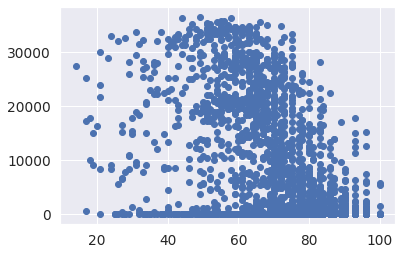

In [ ]:
plt.scatter(x=df['humidity'], y=df['power-generated']);

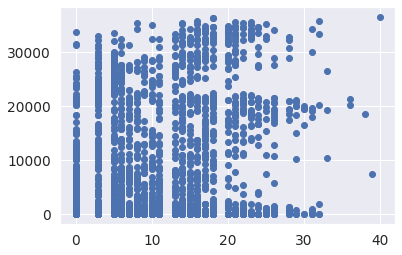

In [ ]:
plt.scatter(x=df['average-wind-speed-(period)'], y=df['power-generated']);

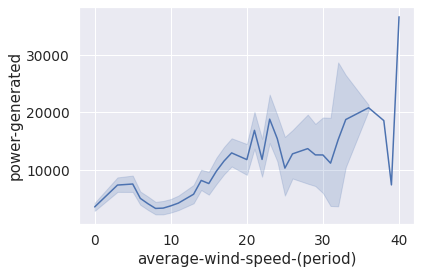

In [ ]:
sns.lineplot(x=df['average-wind-speed-(period)'], y=df['power-generated']);

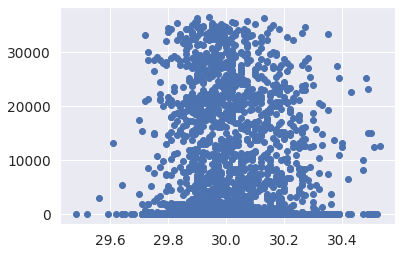

In [ ]:
plt.scatter(x=df['average-pressure-(period)'], y=df['power-generated']);

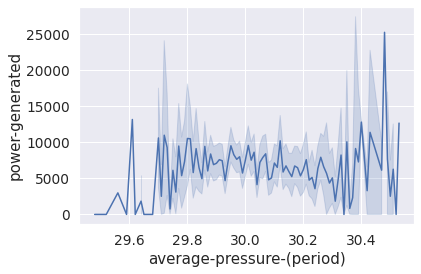

In [ ]:
sns.lineplot(x=df['average-pressure-(period)'], y=df['power-generated']);

ANALYSING POWER GENERATED VARIABLE

In [ ]:
df['power-generated'].describe()

count     2920.000000
mean      6979.846233
std      10312.336413
min          0.000000
25%          0.000000
50%        404.000000
75%      12723.500000
max      36580.000000
Name: power-generated, dtype: float64

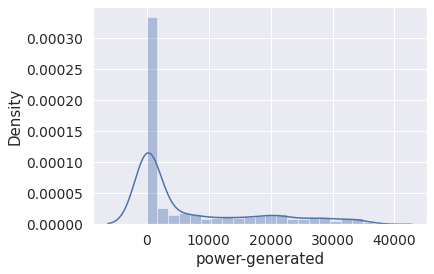

In [ ]:
sns.distplot(df['power-generated']);

In [ ]:
df['power-generated'].skew()

1.3070350643796376

In [ ]:
df['power-generated'].kurt()

0.3422061207741227

RELATIONSHIP WITH NUMERICAL VALUES

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


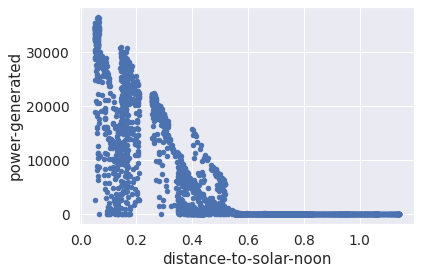

In [ ]:
var="distance-to-solar-noon"
data = pd.concat([df['power-generated'], df[var]], axis=1)
data.plot.scatter(x=var, y='power-generated');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


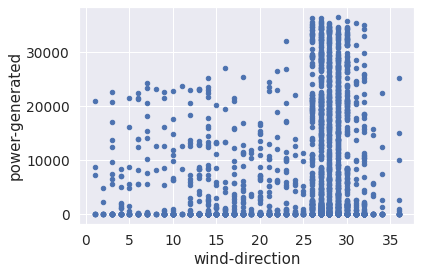

In [ ]:
var="wind-direction"
data = pd.concat([df['power-generated'], df[var]], axis=1)
data.plot.scatter(x=var, y='power-generated');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


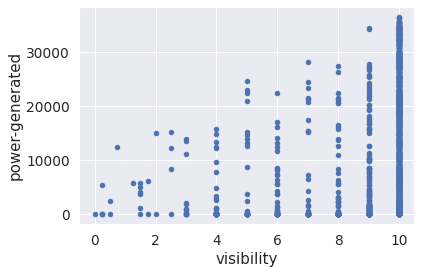

In [ ]:
var="visibility"
data = pd.concat([df['power-generated'], df[var]], axis=1)
data.plot.scatter(x=var, y='power-generated');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


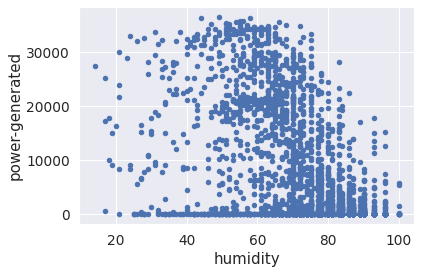

In [ ]:
var="humidity"
data = pd.concat([df['power-generated'], df[var]], axis=1)
data.plot.scatter(x=var, y='power-generated');

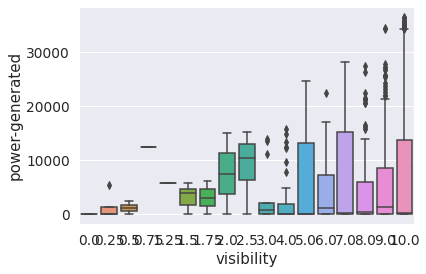

In [ ]:
ax = sns.boxplot(x="visibility", y="power-generated", data=df)

ANALYSING OTHER VARIABLES USING SCATTER PLOTS

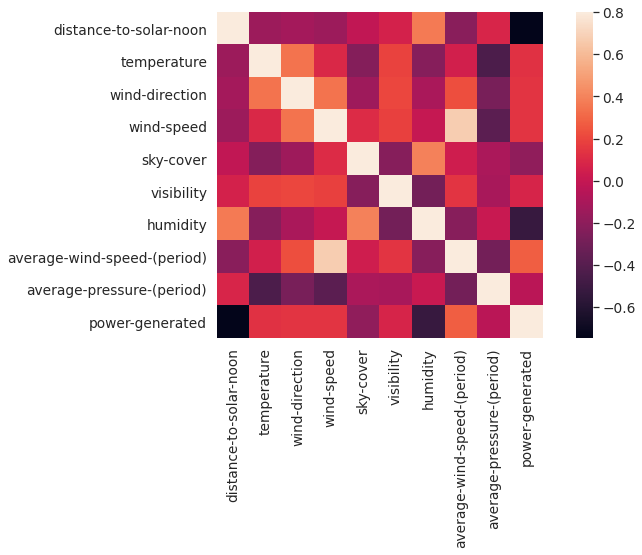

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

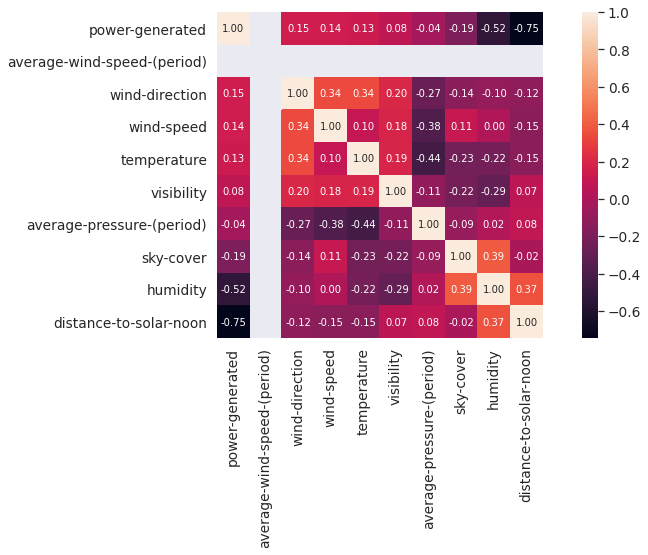

In [ ]:
#saleprice correlation matrix
plt.figure(figsize=(14,6))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'power-generated')['power-generated'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
average-wind-speed-(period),1,0.000342
power-generated,0,0.000000
average-pressure-(period),0,0.000000
humidity,0,0.000000
visibility,0,0.000000
sky-cover,0,0.000000
wind-speed,0,0.000000
wind-direction,0,0.000000
temperature,0,0.000000
distance-to-solar-noon,0,0.000000


PREPROCESSING

In [ ]:
#standardizing data
power_scaled = StandardScaler().fit_transform(df['power-generated'][:,np.newaxis]);
low_range = power_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= power_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]
 [-0.67696024]]

outer range (high) of the distribution:
[[2.75689438]
 [2.76358654]
 [2.7647504 ]
 [2.77124858]
 [2.77920159]
 [2.78967627]
 [2.79307085]
 [2.85029368]
 [2.85339729]
 [2.8708551 ]]


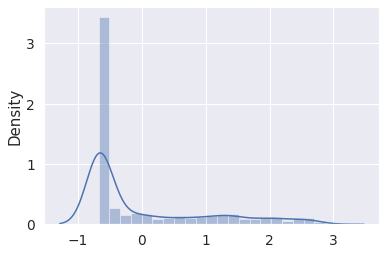

In [ ]:
sns.distplot(power_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


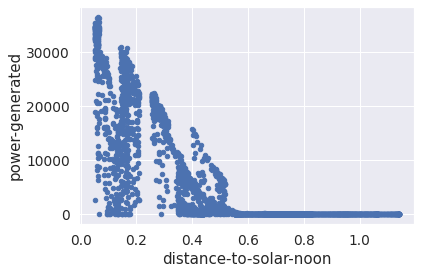

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'distance-to-solar-noon'
data = pd.concat([df['power-generated'], df[var]], axis=1)
data.plot.scatter(x=var, y='power-generated');

Normality

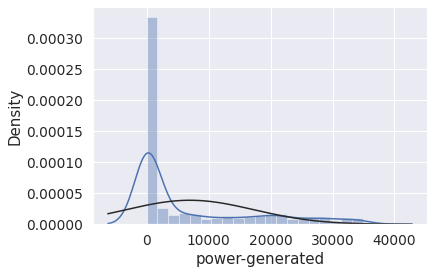

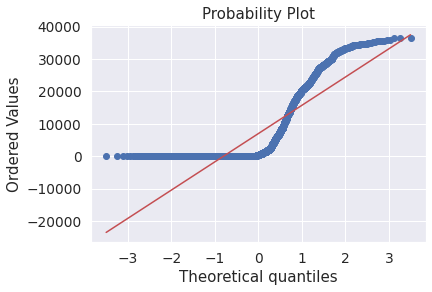

In [ ]:
#histogram and normal probability plot
sns.distplot(df['power-generated'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['power-generated'], plot=plt)

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['power>0'] = pd.Series(len(df['power-generated']), index=df.index)
df['power>0'] = 0 
df.loc[df['power-generated']>0,'power>0'] = 1

In [ ]:
df.loc[df['power>0']==1,'power-generated'] = np.log(df['power-generated'])

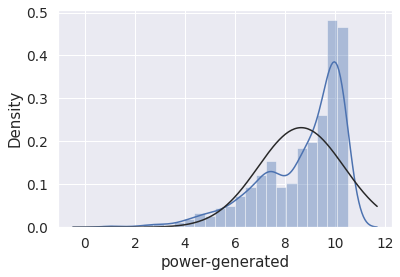

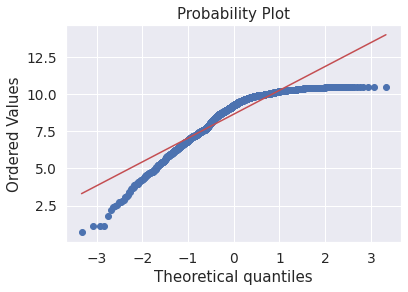

In [ ]:
#histogram and normal probability plot
sns.distplot(df[df['power-generated']>0]['power-generated'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['power-generated']>0]['power-generated'], plot=plt)

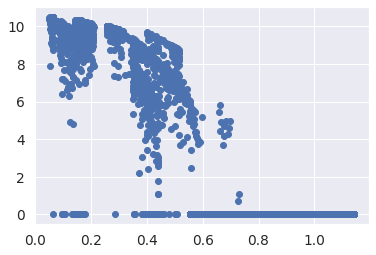

In [ ]:
#scatter plot
plt.scatter(df['distance-to-solar-noon'], df['power-generated']);